1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [1]:
import pandas as pd # manejo y analisis de estructura de datos
import numpy as np # calculo numerico y analisis de datos
import seaborn as sns # creacion de graficas estadisticas
import matplotlib.pyplot as plt # creacion grafica en dos dimenciones

# librerias para implementar modelos de ciencias de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression # regresion logistica
from sklearn.linear_model import LinearRegression # libreria para regresion lineal
from sklearn.metrics import classification_report, confusion_matrix

#lectura de datos en python y lo cargamos en la variable datos
Datos = pd.read_csv('./Titanic-Dataset.csv')

# realizamos lectura de los datos para analisis exploratorio de los datos
Datos.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
#descripcion de los datos maximo minimo el promedio ....
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

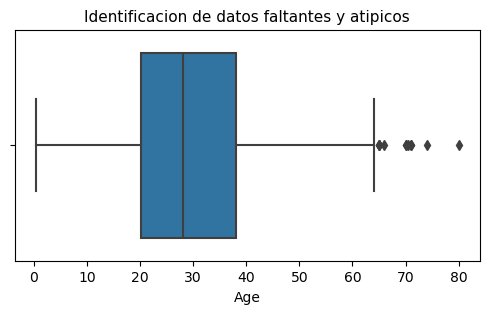

In [3]:
# identificacion de datos faltantes y atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=11)

Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

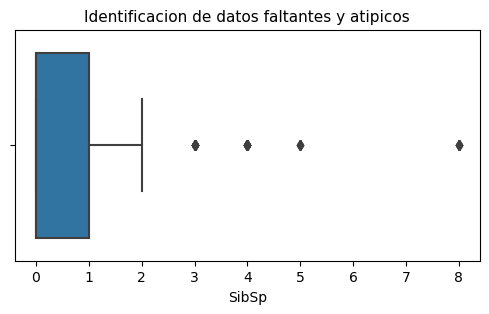

In [4]:
# identificacion de datos faltantes y atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['SibSp'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=11)

2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario.

In [5]:
print("Cantidad de registros con NaN en Survived: ", Datos['Survived'].isna().sum())
print("Cantidad de registros con NaN en Pclass: ", Datos['Pclass'].isna().sum())
print("Cantidad de registros con NaN en Name: ", Datos['Name'].isna().sum())
print("Cantidad de registros con NaN en Sex: ", Datos['Sex'].isna().sum())
print("Cantidad de registros con NaN en Age: ", Datos['Age'].isna().sum())
print("Cantidad de registros con NaN en SibSp: ", Datos['SibSp'].isna().sum())
print("Cantidad de registros con NaN en Parch: ", Datos['Parch'].isna().sum())
print("Cantidad de registros con NaN en Ticket: ", Datos['Ticket'].isna().sum())
print("Cantidad de registros con NaN en Fare: ", Datos['Fare'].isna().sum())
print("Cantidad de registros con NaN en Cabin: ", Datos['Cabin'].isna().sum())
print("Cantidad de registros con NaN en Embarked: ", Datos['Embarked'].isna().sum())

Cantidad de registros con NaN en Survived:  0
Cantidad de registros con NaN en Pclass:  0
Cantidad de registros con NaN en Name:  0
Cantidad de registros con NaN en Sex:  0
Cantidad de registros con NaN en Age:  177
Cantidad de registros con NaN en SibSp:  0
Cantidad de registros con NaN en Parch:  0
Cantidad de registros con NaN en Ticket:  0
Cantidad de registros con NaN en Fare:  0
Cantidad de registros con NaN en Cabin:  687
Cantidad de registros con NaN en Embarked:  2


In [6]:
#reemplazar todos los ceros con el valor medio (promedio) de la columna
Datos['Age'] = Datos['Age'].fillna(Datos['Age'].mean())
Datos['Cabin'] = Datos['Cabin'].fillna('C103')
Datos['Embarked'] = Datos['Embarked'].fillna('S')

In [7]:
print("Cantidad de registros con NaN en Age: ", Datos['Age'].isna().sum())
print("Cantidad de registros con NaN en Cabin: ", Datos['Cabin'].isna().sum())
print("Cantidad de registros con NaN en Embarked: ", Datos['Embarked'].isna().sum())

Cantidad de registros con NaN en Age:  0
Cantidad de registros con NaN en Cabin:  0
Cantidad de registros con NaN en Embarked:  0


Text(0.5, 1.0, 'Identificacion de datos atipicos')

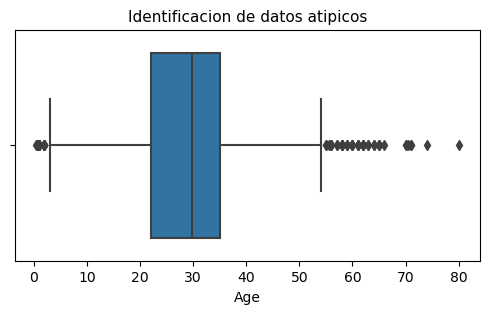

In [8]:
#identificacion de datos atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificacion de datos atipicos', fontsize=11)

In [9]:
nivel_minimo=4
nivel_maximo=79
total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(total_Atipicos))

El total de datos atipicos es 31


In [10]:
#filtrar datos atipicos, es decir que solo me deje los que estan entre 4 y 79
Datos=Datos[(Datos['Age']<nivel_maximo)&(Datos['Age']>nivel_minimo)]

In [11]:
# comprovar que se hayan removido los datos atipicos
total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(total_Atipicos))

El total de datos atipicos es 0


In [12]:
#revision de tipo de datos y de datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  850 non-null    int64  
 1   Survived     850 non-null    int64  
 2   Pclass       850 non-null    int64  
 3   Name         850 non-null    object 
 4   Sex          850 non-null    object 
 5   Age          850 non-null    float64
 6   SibSp        850 non-null    int64  
 7   Parch        850 non-null    int64  
 8   Ticket       850 non-null    object 
 9   Fare         850 non-null    float64
 10  Cabin        850 non-null    object 
 11  Embarked     850 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 86.3+ KB


3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de característica

la variable objetivo es si sobrevivio o no "Survived"

In [13]:
#total de personas con Survived, es decir 0 no y 1 si sobrevivio
Datos['Survived'].value_counts()

Survived
0    536
1    314
Name: count, dtype: int64

In [14]:
Datos[['Survived']].head(30)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
8,1
9,1
11,1


4. Dividir el dataset en Train y Test para evaluar correctamente el 
modelo.

In [15]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables independientes (X) y variable objetivo (Y)
X = Datos.drop('Survived', axis=1)
Y = Datos['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba sin estratificación
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [16]:
print(X_train)

     PassengerId  Pclass                               Name     Sex  \
276          277       3  Lindblom, Miss. Augusta Charlotta  female   
369          370       1      Aubart, Mme. Leontine Pauline  female   
812          813       2          Slemen, Mr. Richard James    male   
82            83       3     McDermott, Miss. Brigdet Delia  female   
69            70       3                  Kink, Mr. Vincenz    male   
..           ...     ...                                ...     ...   
876          877       3      Gustafsson, Mr. Alfred Ossian    male   
206          207       3         Backstrom, Mr. Karl Alfred    male   
660          661       1      Frauenthal, Dr. Henry William    male   
586          587       2            Jarvis, Mr. John Denzil    male   
716          717       1      Endres, Miss. Caroline Louise  female   

           Age  SibSp  Parch    Ticket      Fare Cabin Embarked  
276  45.000000      0      0    347073    7.7500  C103        S  
369  24.000000 

In [17]:
print (Y_train)

276    0
369    1
812    0
82     1
69     0
      ..
876    0
206    0
660    1
586    0
716    1
Name: Survived, Length: 637, dtype: int64


5.Entrenar el modelo configurando los diferentes hiperparámetros.

In [19]:
from sklearn.linear_model import LinearRegression

# Crear una instancia del modelo de Regresión Lineal
modelo_regresion = LinearRegression()

# Codificar características categóricas usando One-Hot Encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Alinear las columnas en los conjuntos de entrenamiento y prueba
X_train_aligned, X_test_aligned = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Entrenar el modelo
modelo_regresion.fit(X_train_aligned, Y_train)

# Crear la predicción
Prediccion = modelo_regresion.predict(X_test_aligned)

In [20]:
print (Y_test)

228    0
310    1
255    1
207    1
170    0
      ..
685    0
52     1
266    0
409    0
373    0
Name: Survived, Length: 213, dtype: int64


In [21]:
print (Prediccion)

[ 0.26395445  1.07889253  0.6302958   0.07339981  0.3205328  -0.1544748
  0.31504005  0.4180971   0.88692721  0.56990023  0.07234819  0.93896441
  0.1815101   0.08596982  0.08321096  1.00614369  0.05809267  0.36772044
  0.67884318  0.43806336  0.59817555  0.71762669  0.07998906 -0.00655978
  0.04959946  0.4857509   0.60278344  0.53343926  0.08090649  0.11191809
 -0.0133058   0.12258839  0.07910579  0.08360823  0.20729311  0.0975487
  0.87196267  0.49157285  0.70688728  0.59670861  0.59716659  0.08816641
  0.87375781  0.49734233  0.35590221  0.59183444  0.04500924  0.42022941
  0.03454937  0.32135048  0.33488173 -0.37842692  0.09110331 -0.22234894
  0.23428696  0.11749252  0.6432754   0.87717384  0.33974214  0.38879951
  0.71490745  0.0677487   0.05886882  0.09376057  0.06655372  0.10884972
  0.58848918  0.75975505  0.40975596  0.92564401  0.05841053  0.54482545
  1.02793134  0.64123561  0.15647457  0.38607966  0.06744747  0.25796621
  0.54737062  0.18729262  1.24065745  0.04745278  0.3

6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Establecer un umbral para convertir el problema a clasificación binaria
umbral = 0.5

# Convertir los valores continuos a etiquetas binarias
Y_test_binario = [1 if y >= umbral else 0 for y in Y_test]
Prediccion_binaria = [1 if y >= umbral else 0 for y in Prediccion]

# Calcular las métricas
accuracy = accuracy_score(Y_test_binario, Prediccion_binaria)
precision = precision_score(Y_test_binario, Prediccion_binaria)
recall = recall_score(Y_test_binario, Prediccion_binaria)
f1 = f1_score(Y_test_binario, Prediccion_binaria)

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8262910798122066
Precision: 0.8285714285714286
Recall: 0.6987951807228916
F1-score: 0.758169934640523


7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

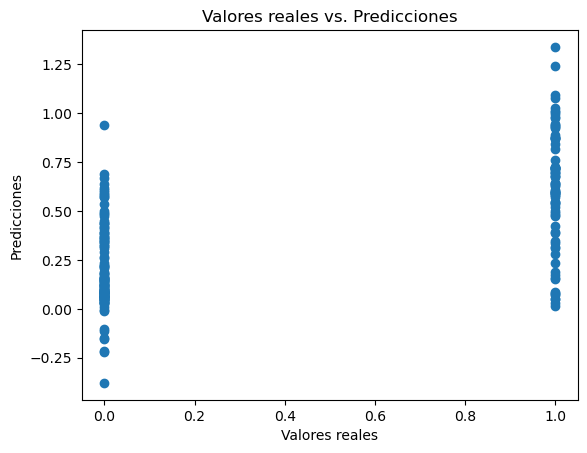

In [26]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, Prediccion)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs. Predicciones")
plt.show()

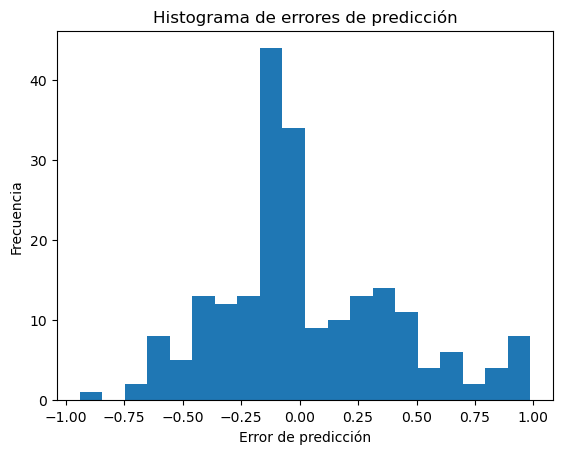

In [27]:
import matplotlib.pyplot as plt

errores = Y_test - Prediccion
plt.hist(errores, bins=20)
plt.xlabel("Error de predicción")
plt.ylabel("Frecuencia")
plt.title("Histograma de errores de predicción")
plt.show()